In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
%matplotlib inline


In [2]:
iris=load_iris()

In [3]:
df=pd.DataFrame(iris.data,columns=[iris.feature_names])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


data preprocessing

In [4]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [5]:
x_sacled=scaler.fit_transform(df)

In [6]:
x_sacled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

apply the pca


In [7]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

In [9]:
pca_scaled=pca.fit_transform(x_sacled)

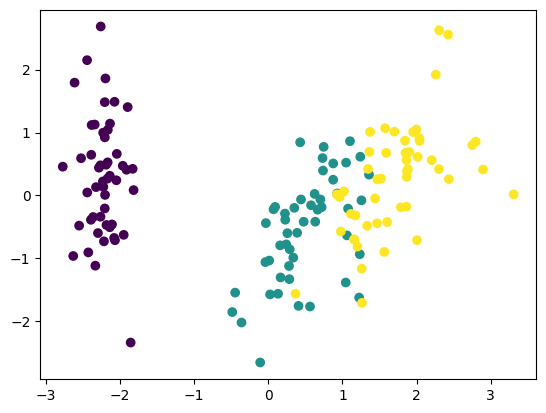

In [10]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=iris.target)

# aglomertatice clustering

Text(0, 0.5, 'Eulcidian Distance')

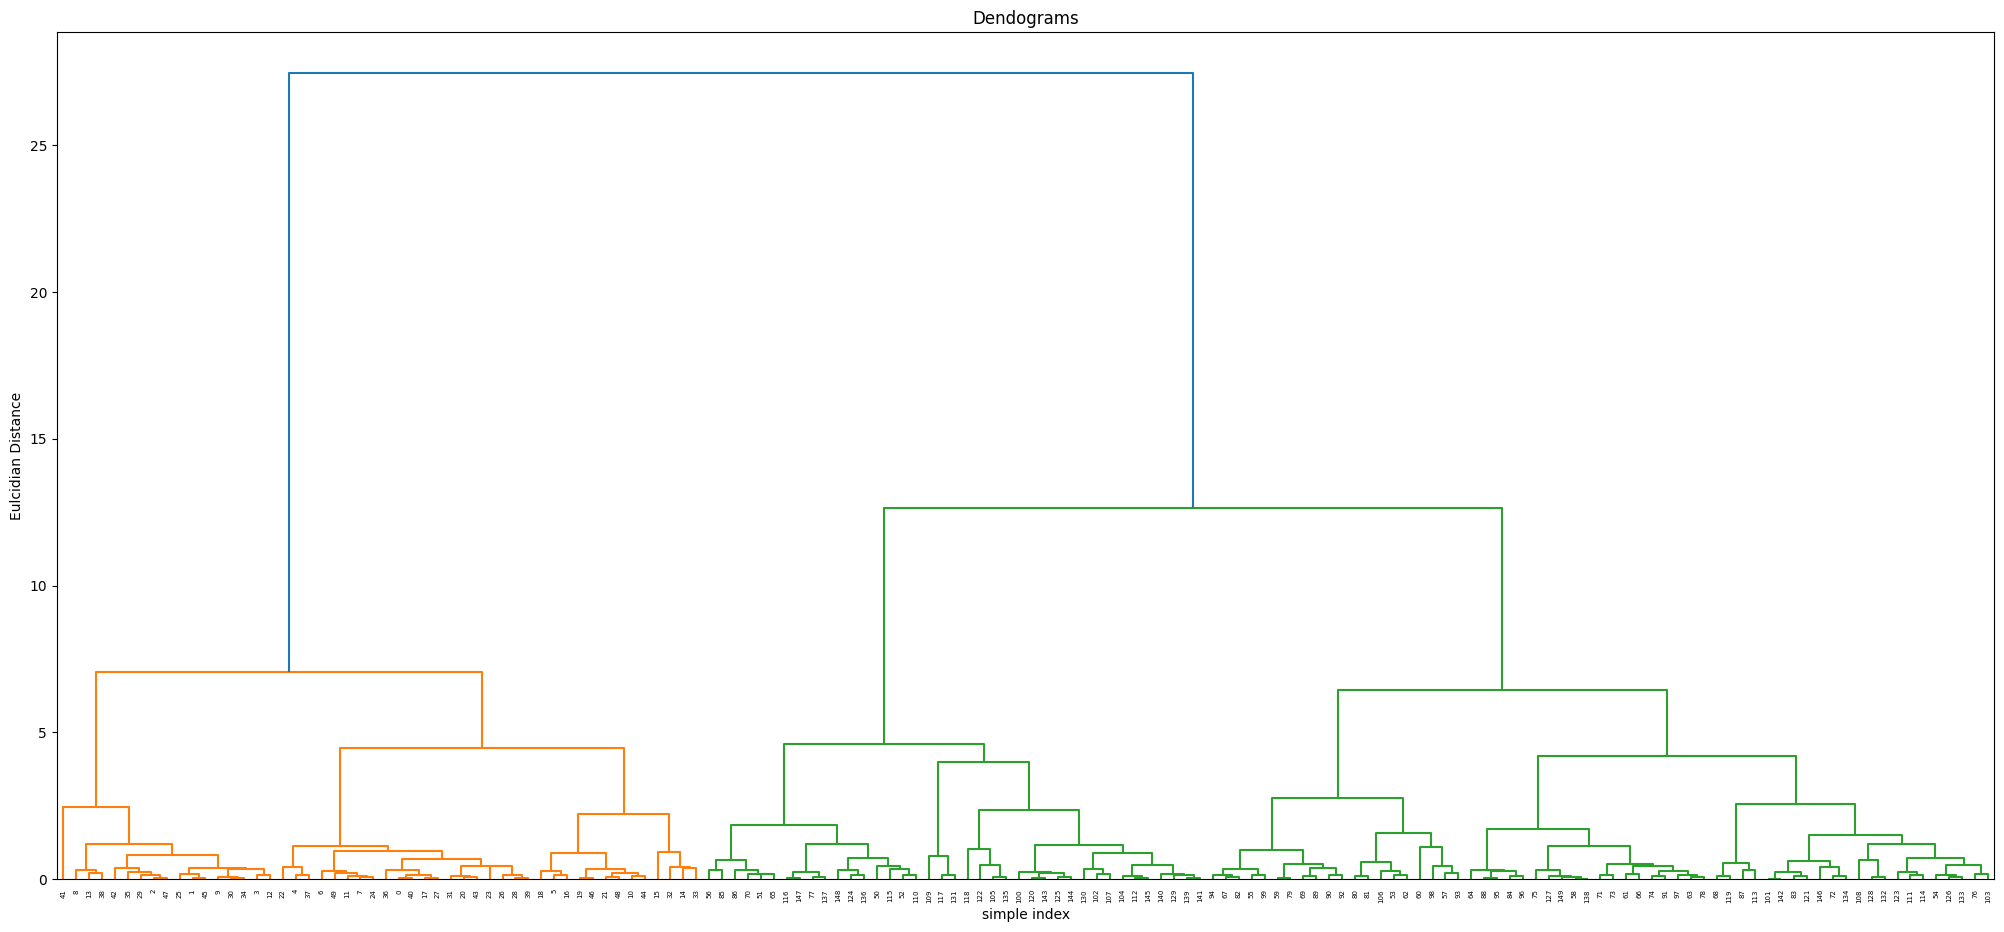

In [13]:
import scipy.cluster.hierarchy as sc

#plot the dendogram
plt.figure(figsize=(25,11))
plt.title("Dendograms")
sc.dendrogram(sc.linkage(pca_scaled,method='ward'))

plt.xlabel("simple index")
plt.ylabel("Eulcidian Distance")

observation : cluster =2

In [15]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,linkage="ward")
cluster.fit(pca_scaled)


,n_clusters,2
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'ward'
,distance_threshold,None
,compute_distances,False


In [16]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

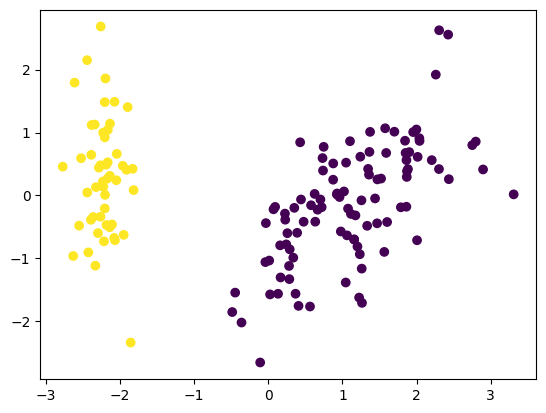

In [17]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)